In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
df_new_api = pd.read_csv("../data/energy_chart_data/energy_chart_data_2021_2023_new_api_15min.csv",parse_dates=["date"])
df_new_api = df_new_api.iloc[:, 1:]

In [4]:
df_old_api = pd.read_csv("../data/energy_chart_data/energy_chart_data_2015_2021_old_api_15min.csv", parse_dates=["date"])
df_old_api = df_old_api.iloc[:, 1:]

In [5]:
df_15min = pd.concat([df_old_api, df_new_api])

In [6]:
df_hour = pd.read_csv("../data/energy_chart_data/energy_chart_data_2015_2023_new-api_hour.csv", parse_dates=["date"])
df_hour = df_hour.iloc[:, 1:]



In [7]:
df_hour.loc[:, "Day-Ahead Auction"] = df_hour.loc[:, "Day Ahead Auction (DE-LU)"]
df_hour.loc[df_hour["Day-Ahead Auction"].isna(),"Day-Ahead Auction"] = df_hour.loc[df_hour["Day-Ahead Auction"].isna(), "Day Ahead Auction (DE-AT-LU)"]
df_hour = df_hour.sort_values(by = "date")

In [8]:
df_hour = df_hour.drop(["Day Ahead Auction (DE-LU)", "Day Ahead Auction (DE-AT-LU)"], axis = 1)

In [9]:
df = df_15min.set_index("date").join(df_hour[["Day-Ahead Auction", "date"]].set_index("date"), how = "left")

KeyError: "None of ['date'] are in the columns"

In [12]:
df = df[~df[["Day-Ahead Auction", "Intraday Continuous 15 minutes ID1-Price"]].isna()]

In [31]:
df = df.sort_index()

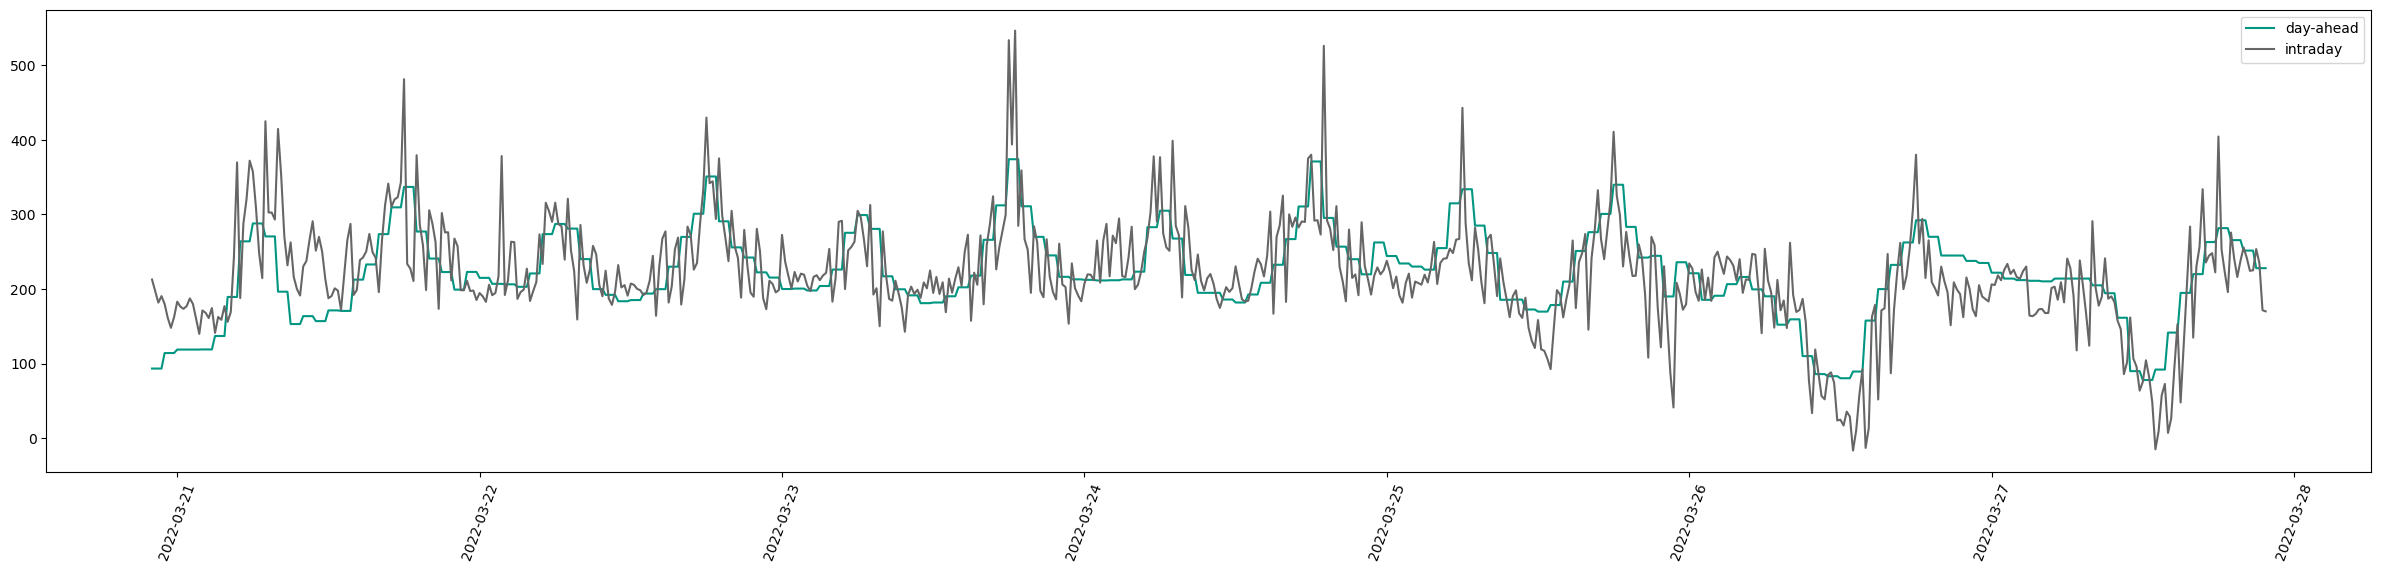

In [43]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(figsize = (30,6)) # This is your answer to resize the figure

plt.plot(df.iloc[-24*4*7:].index, df["Day-Ahead Auction"].iloc[-24*4*7:], label = "day-ahead", c = "#009682")
plt.plot(df.iloc[-24*4*7:].index, df["Intraday Continuous 15 minutes ID1-Price"].iloc[-24*4*7:], label = "intraday", color='#666666')
plt.legend()
plt.xticks(rotation=70)
plt.show()

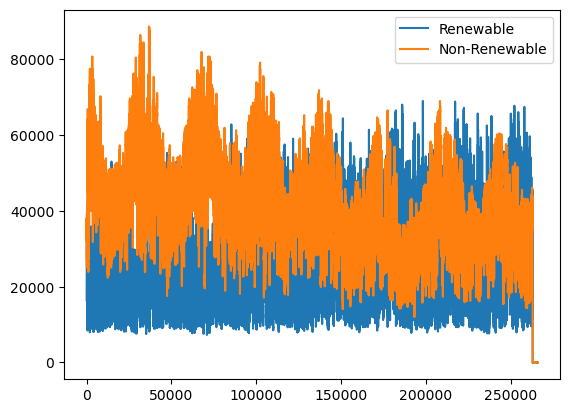

In [73]:
plt.plot(df["Renewable"], label = "Renewable")
plt.plot(df["Non-Renewable"], label = "Non-Renewable")
plt.legend()

In [78]:
print(f'Share of Nans in Intraday Continous Average Price {df["Intraday Continuous Average Price"].isna().sum() /len(df)}')

Share of Nans in Intraday Continous Average Price 0.9889842400893902


In [80]:
df[~ df["Intraday Continuous Average Price"].isna()]

,Import Balance,Nuclear,Non-Renewable,Renewable,Load,date,Intraday Continuous Average Price,Day-Ahead Auction
262848,-1.892,NaN,29.216,21.309,49.186,2022-06-30 22:00:00,232.04,268.71
262849,-1.496,NaN,29.224,20.266,48.118,2022-06-30 23:00:00,229.81,265.86
262850,-0.809,NaN,29.378,19.298,47.976,2022-07-01 00:00:00,235.74,268.01
262851,-0.624,NaN,29.413,19.157,47.808,2022-07-01 01:00:00,230.16,266.12
262852,-0.061,NaN,29.507,19.994,48.272,2022-07-01 02:00:00,228.69,265.38
...,...,...,...,...,...,...,...,...
265771,NaN,NaN,25.147,12.054,48.971,2022-10-30 17:00:00,170.46,170.38
265772,NaN,NaN,25.219,13.004,47.362,2022-10-30 18:00:00,174.80,165.00
265773,NaN,NaN,25.171,13.591,45.993,2022-10-30 19:00:00,153.37,147.52
265774,NaN,NaN,25.058,14.010,44.733,2022-10-30 20:00:00,142.17,138.96


In [81]:
prices = df[~ df["Intraday Continuous Average Price"].isna()]

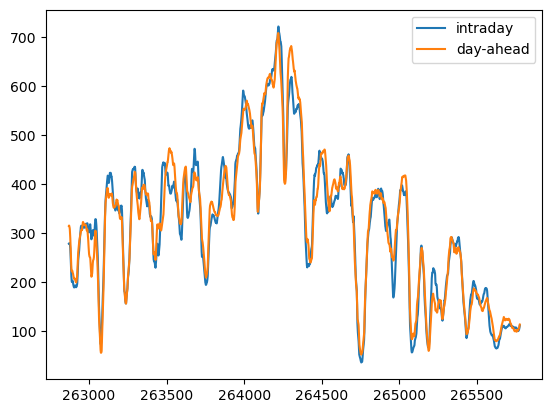

In [85]:
plt.plot(prices["Intraday Continuous Average Price"].rolling(24).mean(), label = "intraday")
plt.plot(prices["Day-Ahead Auction"].rolling(24).mean(), label = "day-ahead")
plt.legend()
plt.show()